In [47]:
import pandas as pd
import matplotlib.pyplot as plt

In [48]:

# Carregar o arquivo JSON usando o pandas
df = pd.read_json('supermarket.json')

# Exibir as primeiras linhas do DataFrame para verificar se os dados foram carregados corretamente
print(df.head())

                                               lojas
0  {'id': 1, 'dados_mensais': [{'mes': 1, 'fatura...
1  {'id': 2, 'dados_mensais': [{'mes': 1, 'fatura...
2  {'id': 3, 'dados_mensais': [{'mes': 1, 'fatura...
3  {'id': 4, 'dados_mensais': [{'mes': 1, 'fatura...
4  {'id': 5, 'dados_mensais': [{'mes': 1, 'fatura...


In [49]:
# Função para extrair os dados de um determinado mês para uma loja específica
def extrair_dados_loja(loja_id, mes):
    for loja in df['lojas']:
        if loja['id'] == loja_id:
            for dados_mensais in loja['dados_mensais']:
                if dados_mensais['mes'] == mes:
                    return dados_mensais
    return None

extrair_dados_loja(5,5)
# Fun

{'mes': 5,
 'faturamento': {'higiene_e_saude': 12500,
  'limpeza': 20500,
  'bebidas': 7800,
  'carne_e_laticinios': 4900,
  'alimentacao': 5300},
 'gastos_funcionarios': 25000,
 'despesas_fornecedores': 20000,
 'gastos_diversos': 7000}

In [50]:
# Função para retornar o Faturamento do Mês
def extrair_faturamento_loja_mes(loja_id, mes):
    for loja in df['lojas']:
        if loja['id'] == loja_id:
            for dados_mensais in loja['dados_mensais']:
                if dados_mensais['mes'] == mes:
                    for faturamento in dados_mensais['faturamento']:
                        faturamento = sum(dados_mensais['faturamento'].values())
                    return faturamento
    return None
print('Faturamento Mensal: R$ ')
extrair_faturamento_loja_mes(5,5)

Faturamento Mensal: R$ 


51000

In [51]:
# Função para retornar o Faturamento do Anual
def extrair_faturamento_loja_ano(loja_id):
    for loja in df['lojas']:
        if loja['id'] == loja_id:
            faturamento_anual =0
            for dados_mensais in loja['dados_mensais']:
                faturamento_anual += sum(dados_mensais['faturamento'].values())           
    return faturamento_anual
   
extrair_faturamento_loja_ano(4)

633600

In [52]:
# Função para retornar o Lucro Mensal
def extrair_faturamento_loja_mes(loja_id, mes):
    for loja in df['lojas']:
        if loja['id'] == loja_id:
            for dados_mensais in loja['dados_mensais']:
                if dados_mensais['mes'] == mes:
                    for faturamento in dados_mensais['faturamento']:
                        faturamento = sum(dados_mensais['faturamento'].values())
                        gastos = dados_mensais['gastos_funcionarios'] + dados_mensais['despesas_fornecedores'] + dados_mensais['gastos_diversos']
                        lucro = faturamento - gastos            
                    return lucro
    return None
print('Lucro Mensal: R$ ')
extrair_faturamento_loja_mes(5,2)

Lucro Mensal: R$ 


4800

In [53]:
# Função para retornar o Lucro do Anual
def extrair_lucro_loja_ano(loja_id):
    for loja in df['lojas']:
        if loja['id'] == loja_id:
            lucro_anual = 0
            for dados_mensais in loja['dados_mensais']:
                faturamento_mes = sum(dados_mensais['faturamento'].values())
                gastos_mes = dados_mensais['gastos_funcionarios'] + dados_mensais['despesas_fornecedores'] + dados_mensais['gastos_diversos']
                lucro_anual += (faturamento_mes - gastos_mes)


    return lucro_anual
   

In [55]:

for i in range(1,6):
    print(extrair_faturamento_loja_ano(i))
    print(extrair_lucro_loja_ano(i))

644800
26200
643000
48400
637500
-127500
633600
-88900
614500
-54500


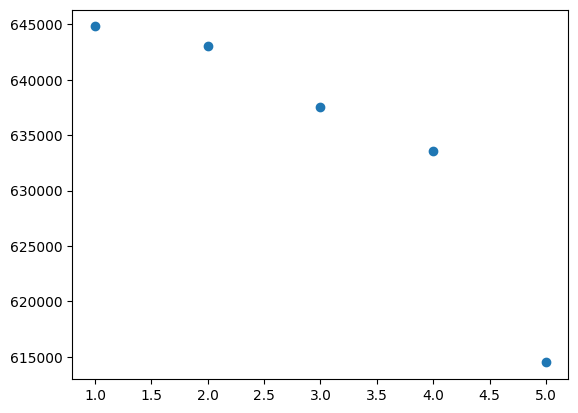

In [62]:
lojas = range(1,6)
faturamento = []
for i in lojas:
    faturamento.append(extrair_faturamento_loja_ano(i))

plt.plot(lojas, faturamento,'o')


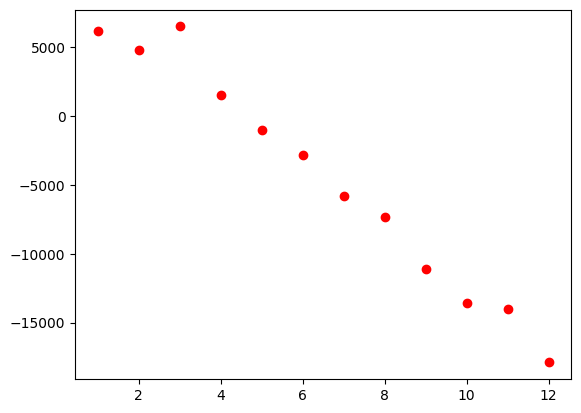

In [67]:
lojas = range(1,6)
meses = range(1,13)
faturamento_mes = []


for i in meses:
    faturamento_mes.append(extrair_faturamento_loja_mes(j,i))

plt.plot(meses, faturamento_mes,'o',color='red')

In [ ]:
def plot_distribuicao_gastos(lojas_id):
    gastos_label = ['faturamento']
    gastos_valores = [extrair_faturamento_loja_ano]
    